In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.utils import to_categorical as to_cat
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from seedtools import load_seed,show_all_datasets
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2,l1

In [2]:
data   = pd.read_csv(load_seed("Social_Network_Ads.csv"))
data.Gender =  data.Gender.map({"Male":1,"Female":0})
ss =  StandardScaler()
x=  data.iloc[:,:-1]
y =  data.iloc[:,-1]
x =  ss.fit_transform(x)

x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)
x_train.shape

- data File ✔
- Seed file ✔
shape :  [400, 5]
columns :  ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
desc :  DATA IS NOT YET PROVIDED


(320, 4)

**SIMPLE MODEL**

In [3]:
model = Sequential([
    Dense(128,activation="relu",input_dim=4),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid")
])
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["acc"])
history =  model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)



Epoch 1/10


10/10 [==============================] - 1s 24ms/step - loss: 0.6028 - acc: 0.7656 - val_loss: 0.5092 - val_acc: 0.8625
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4707 - acc: 0.8719 - val_loss: 0.4269 - val_acc: 0.8625
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.3962 - acc: 0.8562 - val_loss: 0.3754 - val_acc: 0.8500
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3440 - acc: 0.8906 - val_loss: 0.3433 - val_acc: 0.8500
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3147 - acc: 0.8906 - val_loss: 0.3245 - val_acc: 0.8625
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2908 - acc: 0.9031 - val_loss: 0.3125 - val_acc: 0.8625
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2747 - acc: 0.8969 - val_loss: 0.3025 - val_acc: 0.8625
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2609 - acc:

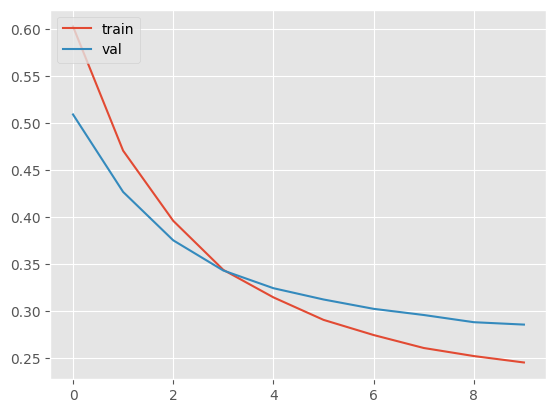

In [4]:
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')

**REGULARIZATION MODEL (l2)**

In [8]:
model_reg = Sequential([
    Dense(128,activation="relu",input_dim=4,kernel_regularizer=l2(0.04)),
    Dense(64,activation="relu",kernel_regularizer=l2(0.05)),
    Dense(1,activation="sigmoid")
])
model_reg.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["acc"])
history =  model_reg.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 14ms/step - loss: 4.6270 - acc: 0.7063 - val_loss: 4.0925 - val_acc: 0.7250
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 3.7797 - acc: 0.7688 - val_loss: 3.4501 - val_acc: 0.8000
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 3.2033 - acc: 0.7969 - val_loss: 2.9389 - val_acc: 0.8250
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 2.7272 - acc: 0.8250 - val_loss: 2.5033 - val_acc: 0.8500
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 2.3191 - acc: 0.8156 - val_loss: 2.1288 - val_acc: 0.8625
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 1.9684 - acc: 0.8281 - val_loss: 1.8077 - val_acc: 0.8625
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 1.6666 - acc: 0.8313 - val_loss: 1.5332 - val_acc: 0.8625
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 1.4089 - acc: 0.8

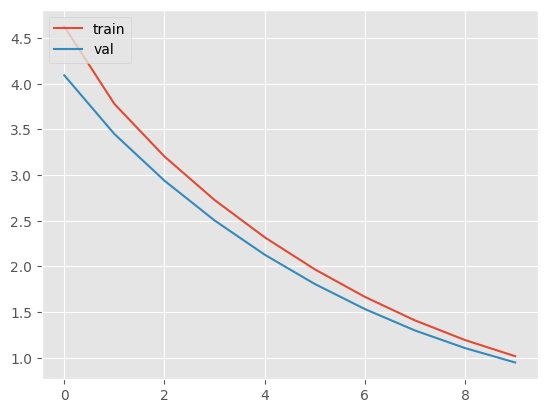

In [9]:
## Loss
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')